第0次，cost是0.8830537463419761
第1000次，cost是0.14973049216090262
第2000次，cost是0.040453087319788396
第3000次，cost是0.02229232277914853
第4000次，cost是0.017032021294267667
第5000次，cost是0.0143570989705236
第6000次，cost是0.012751749251181044
第7000次，cost是0.011652992168177743
第8000次，cost是0.01085455669154824
第9000次，cost是0.01024832355760734
第10000次，cost是0.009779394912400515
第11000次，cost是0.009388512707955786
第12000次，cost是0.009072603116507674
第13000次，cost是0.008806396753491217
第14000次，cost是0.008577853656816098


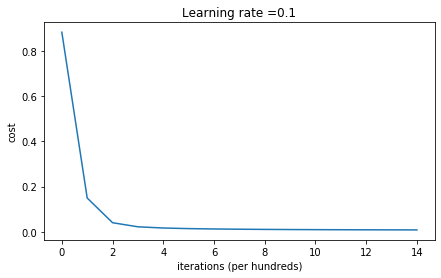

Accuracy: 0.9933333333333333
Accuracy: 0.96


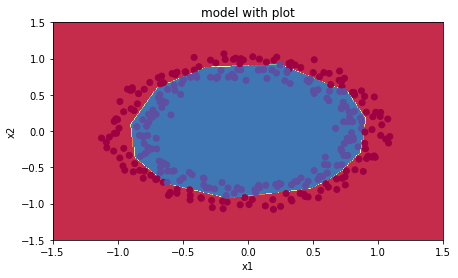

In [1]:
#--实验不同初始化参数的方法的影响
#----使用0来初始化参数
#----使用随机数初始化参数
#----使用抑梯度异常初始化参数
#----2019.7.4 by init_bin
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

import init_utils
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
train_x, train_y, test_x, test_y = init_utils.load_dataset(is_plot=False)

#初始化参数为0
def initialization_zeros(layer_dims):
    """
    初始化参数为0
    layer_dims-神经网络的层数及节点数
    返回：
        parameters-返回初始化的参数字典
    """
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = np.zeros((layer_dims[l],layer_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def initialization_random(layer_dims):
    """
    随机进行初始化参数：np.random.randn
    layer_dims-神经网络的层数及节点
    返回：
        parameters-返回初始化的参数字典
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def initialization_he(layer_dims):
    """
    Xavier initialization: np.sqrt(2/layer_dims[l-1])
    layer_dims-神经网络的层数及节点
    返回：
        parameters-返回初始化的参数字典
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def model(X, Y, learning_rate=0.1, num_iterations=15000,print_cost=True,
          initialization = "he",is_plot=True):
    """
    实现的是一个三层的神经网络：linear>relu>linear>relu>linear>sigmoid
    参数：
        X-输入的数据，维度是（2，m)
        Y-标签维度是（1，m）
        learning_rate-学习速率
        num_iterations-迭代次数
        print_cost-是否打印cost的值
        initialization-初始化的选择
        is_plot-是否画出cost随迭代次数变化曲线
    返回值：
        parameters-返回最终学习更新的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layer_dims = [X.shape[0], 10, 5, 1]
    L = len(layer_dims)
    if initialization == "zeros":
        parameters = initialization_zeros(layer_dims)
    elif initialization == "random":
        parameters = initialization_random(layer_dims)
    elif initialization == "he":
        parameters = initialization_he(layer_dims)
    else:
        print("初始化有误")
        exit
    for i in range(num_iterations):
        A3, cache = init_utils.forward_propagation(X, parameters) #前向传播
        cost = init_utils.compute_loss(A3, Y)   #计算成本
        grads = init_utils.backward_propagation(X, Y, cache)  #反向传播
        parameters = init_utils.update_parameters(parameters, grads, learning_rate)
        
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print("第{}次，cost是{}".format(i,cost))
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
     #返回学习完毕后的参数
    return parameters

#调用model
parameters = model(train_x,train_y,initialization="he")
#打印训练和测试准确率
train_acc = init_utils.predict(train_x,train_y,parameters)
test_acc = init_utils.predict(test_x,test_y,parameters)
# print("train_acc:" + str(train_acc))
# print("test_acc" + str(test_acc))
#绘图
plt.title("model with plot")
axes = plt.gca()
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x:init_utils.predict_dec(parameters,x.T),
                                  train_x, np.squeeze(train_y))     